In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

### 1. Dataset

In [2]:
dataset = pd.read_csv("occupancy.csv")
dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [3]:
_2D_features = dataset[['Light', 'CO2']]
_2D_features = (_2D_features - _2D_features.mean()) / _2D_features.std()
X = _2D_features.values
y = dataset.Occupancy.values
y = y.reshape((y.shape[0], 1))

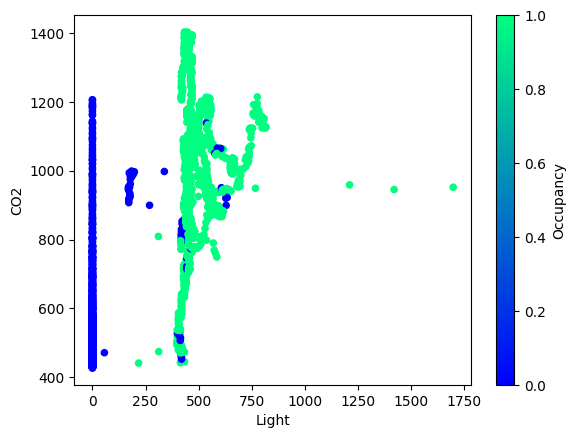

In [4]:
dataset.plot.scatter(x='Light',y='CO2', c='Occupancy', colormap='winter')
plt.show()

### 2. Modèle


In [5]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [7]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [8]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [9]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [10]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [11]:
def predict(X, W, b):
    A = modele(X, W, b)
    return A >= 0.5

### 5. Modèle final

In [12]:
def regression_logistique(X, y, learning_rate=0.01, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
    # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

    # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

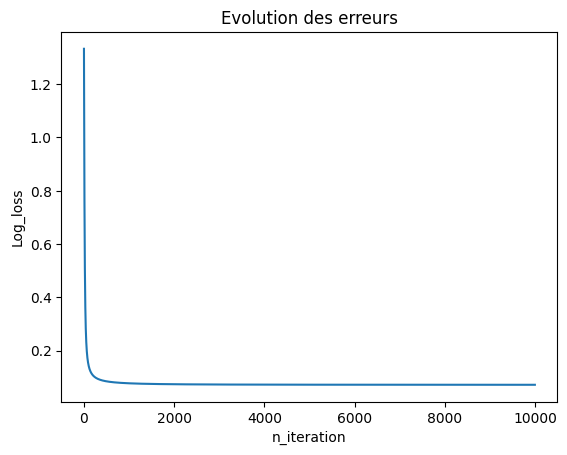

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4)
W,b=regression_logistique(X_train, Y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [14]:
from sklearn.metrics import accuracy_score
y_train_pred = predict(X_train, W, b)
y_test_pred = predict(X_test, W, b)

[False]
[ True]
[ True]


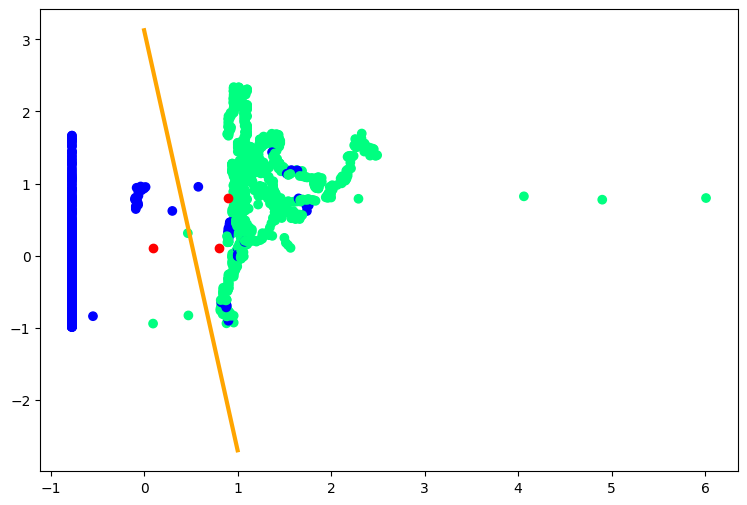

In [15]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 1, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments
new_1=np.array([0.1,0.1])
new_2=np.array([0.8,0.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [16]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_train_pred = predict(X_train, W, b)
y_test_pred = predict(X_test, W, b)
train_cm = confusion_matrix(Y_train, y_train_pred)
test_cm = confusion_matrix(Y_test, y_test_pred)

<Axes: >

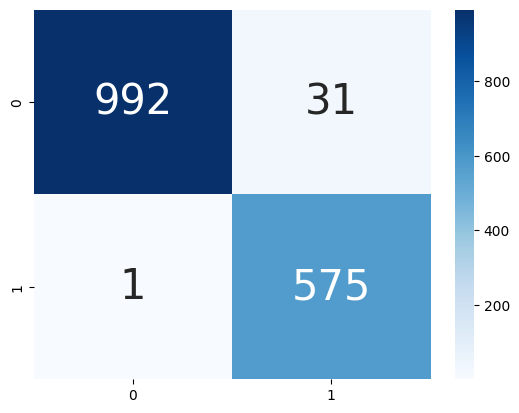

In [17]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
sns.heatmap(train_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues")

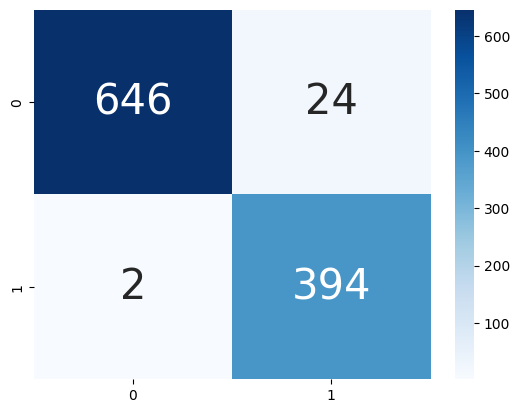

In [18]:
sns.heatmap(test_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues")
plt.show()

In [19]:
def coef(cm):
    return np.diagonal(cm).sum() / cm.sum()

In [20]:
coef(train_cm)

0.9799874921826142

In [21]:
coef(test_cm)

0.975609756097561

In [24]:
_3D_features = dataset[['Light', 'CO2', 'Humidity']]
_3D_features = (_3D_features - _3D_features.mean()) / _3D_features.std()

X = _3D_features.values

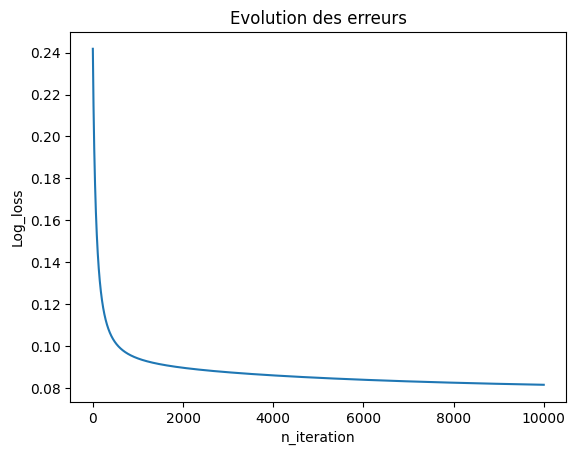

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4)
W,b=regression_logistique(X_train, Y_train)

In [26]:
y_train_pred = predict(X_train, W, b)
y_test_pred = predict(X_test, W, b)

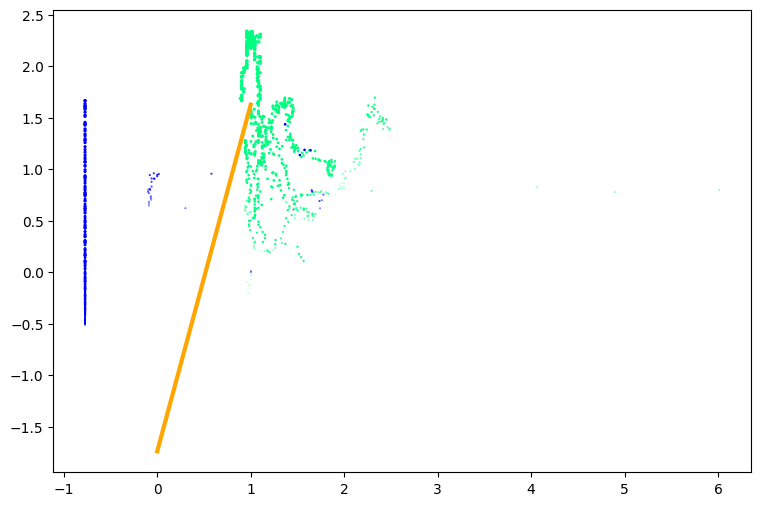

In [30]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], X[:, 2], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 1, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)


plt.show()